In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("F:\PYTHAN\PYTHAN\iNeuron\EDA\Ref_ipynb\Zomato Dataset Practical EDA Implementation\zomato.csv",encoding = 'latin-1')

In [3]:
df.shape

(9551, 21)

In [4]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df['Restaurant ID'].unique()

array([6317637, 6304287, 6300002, ..., 5915807, 5916112, 5927402],
      dtype=int64)

In [7]:
for i in df.columns:
   
    print(df[i].unique())

[6317637 6304287 6300002 ... 5915807 5916112 5927402]
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A\x81ô\x81ôk Kahve' "Walter's Coffee Roastery"]
[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'
 'Ojo Caliente' 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola'
 'Phillip Island' 'Pocatello' 'Potrero' 'Princeton' '

In [24]:
df1_num = []
df1_cat = []
for i in df.columns:
    if df[i].dtypes =='O':
        df1_cat.append(i)
    else:
        df1_num.append(i)

In [25]:
df[df1_cat]

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,Green,Very Good
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",Botswana Pula(P),No,No,No,No,Dark Green,Excellent
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,NamlÛ± Gurme,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",Turkish,Turkish Lira(TL),No,No,No,No,Green,Very Good
9547,Ceviz AÛôacÛ±,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul","World Cuisine, Patisserie, Cafe",Turkish Lira(TL),No,No,No,No,Green,Very Good
9548,Huqqa,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul","Italian, World Cuisine",Turkish Lira(TL),No,No,No,No,Yellow,Good
9549,Aôôk Kahve,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",Restaurant Cafe,Turkish Lira(TL),No,No,No,No,Green,Very Good


# In Data Analysis Whats All Things We Do:-
Missing Values

Explore about the Numerical Variables

Explore About the categorical Variables

Finding Relationship Between Features.

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Missing value in Cuisines  column

In [9]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [10]:
df_country = pd.read_excel("F:\PYTHAN\PYTHAN\iNeuron\EDA\Ref_ipynb\Zomato Dataset Practical EDA Implementation\Country-Code.xlsx")

In [11]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [26]:
df2=pd.merge(df,df_country,on = 'Country Code',how = 'left')

In [27]:
df2.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines


In [28]:
df2.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [33]:
df2_num = []
df2_cat = []
for i in df2.columns:
    if df2[i].dtypes =='O':
        df2_cat.append(i)
    else:
        df2_num.append(i)

In [34]:
df2_num

['Restaurant ID',
 'Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

In [35]:
type(df2_num)

list

In [36]:
df[df2_num]

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,6317637,162,121.027535,14.565443,1100,3,4.8,314
1,6304287,162,121.014101,14.553708,1200,3,4.5,591
2,6300002,162,121.056831,14.581404,4000,4,4.4,270
3,6318506,162,121.056475,14.585318,1500,4,4.9,365
4,6314302,162,121.057508,14.584450,1500,4,4.8,229
...,...,...,...,...,...,...,...,...
9546,5915730,208,28.977392,41.022793,80,3,4.1,788
9547,5908749,208,29.041297,41.009847,105,3,4.2,1034
9548,5915807,208,29.034640,41.055817,170,4,3.7,661
9549,5916112,208,29.036019,41.057979,120,4,4.0,901


In [37]:
df[df2_num].head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,6317637,162,121.027535,14.565443,1100,3,4.8,314
1,6304287,162,121.014101,14.553708,1200,3,4.5,591
2,6300002,162,121.056831,14.581404,4000,4,4.4,270
3,6318506,162,121.056475,14.585318,1500,4,4.9,365
4,6314302,162,121.057508,14.584450,1500,4,4.8,229


In [39]:
df2_cat

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text',
 'Country']

In [41]:
type(df2[df2_cat])

pandas.core.frame.DataFrame

In [44]:
df2[df2_cat]

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,Phillipines
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,Phillipines
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,Green,Very Good,Phillipines
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",Botswana Pula(P),No,No,No,No,Dark Green,Excellent,Phillipines
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,NamlÛ± Gurme,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",Turkish,Turkish Lira(TL),No,No,No,No,Green,Very Good,Turkey
9547,Ceviz AÛôacÛ±,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul","World Cuisine, Patisserie, Cafe",Turkish Lira(TL),No,No,No,No,Green,Very Good,Turkey
9548,Huqqa,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul","Italian, World Cuisine",Turkish Lira(TL),No,No,No,No,Yellow,Good,Turkey
9549,Aôôk Kahve,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",Restaurant Cafe,Turkish Lira(TL),No,No,No,No,Green,Very Good,Turkey


In [48]:
df2.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [50]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [54]:
df2.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [56]:
df2.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines


In [71]:
## With Respect to Country columns ,it is used to find totol value counts.

df2['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
South Africa        60
Brazil              60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Sri Lanka           20
Singapore           20
Qatar               20
Canada               4
Name: Country, dtype: int64

In [72]:
## Plotting  chart for - Top 3 countries that use zomato
c=df2['Country'].value_counts()[0:10]


<AxesSubplot:>

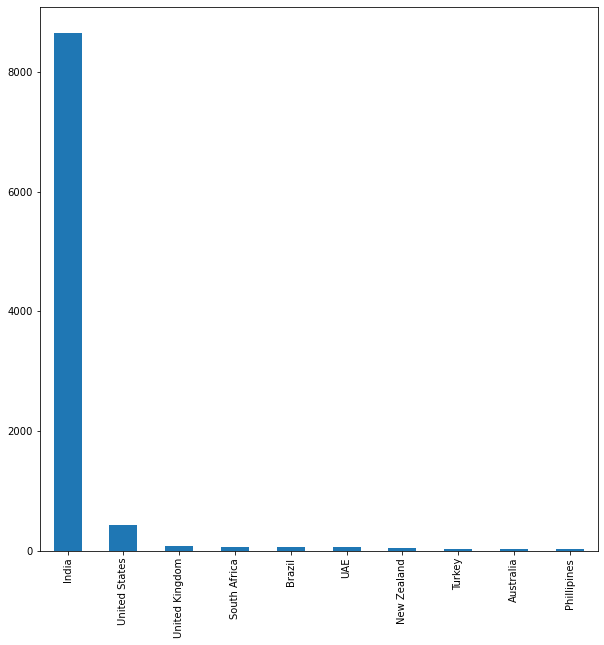

In [78]:
plt.figure(figsize = (10,10))
c.plot(kind = 'bar')

In [93]:
## We are Grouping the columns 'Aggregate rating', 'Rating color', 'Rating text' By using Groupby function.
df2.groupby(['Aggregate rating','Rating color','Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [123]:
##Find the Countries name that has given 0 rating ?
df2[df2['Aggregate rating'] == 0].Country.value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [84]:
df2.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


<AxesSubplot:xlabel='Country', ylabel='Aggregate rating'>

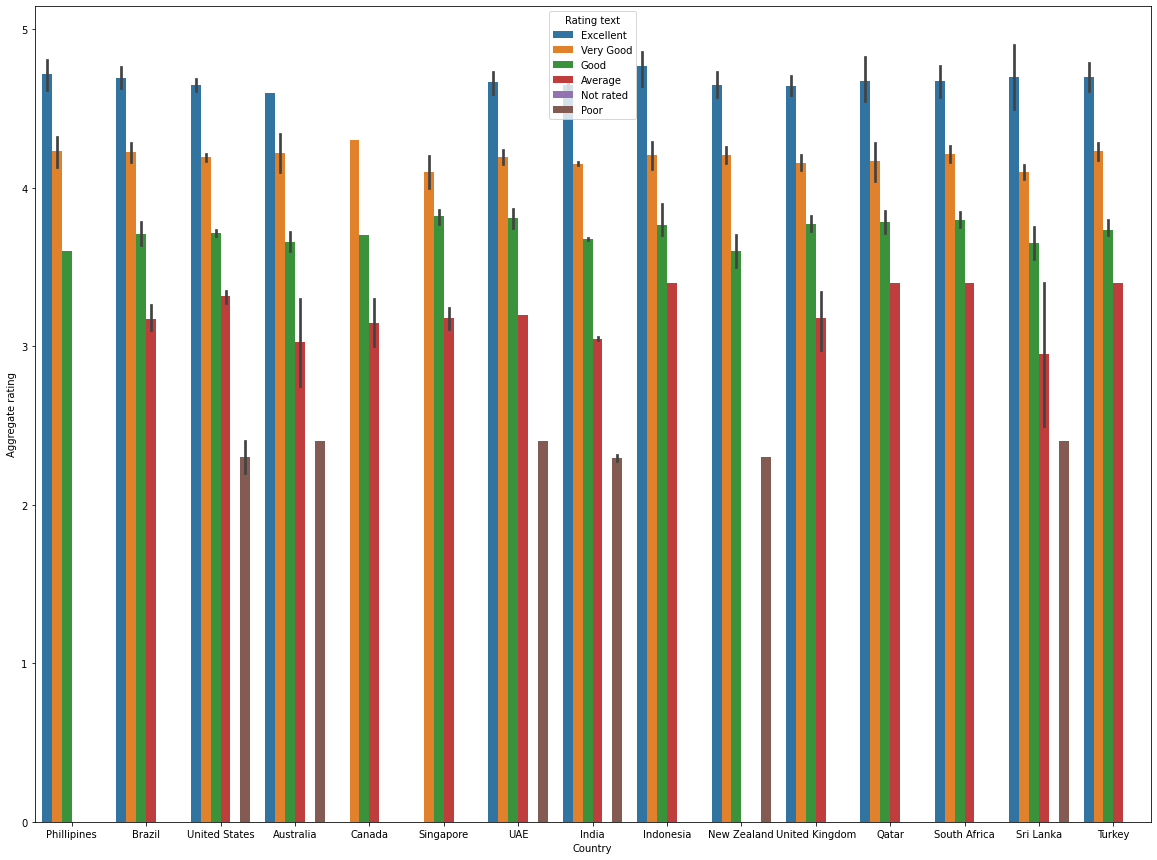

In [120]:
plt.figure(figsize = (20,15))
sns.barplot(x = 'Country',y = 'Aggregate rating', data  = df2,hue = 'Rating text')

In [140]:
#Find Out which currency is used by which country 
df2.groupby(['Country','Currency']).count()

,,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Country,Currency,,,,,,,,,,,,,,,,,,,,
Australia,Dollar($),24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
Brazil,Brazilian Real(R$),60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
Canada,Dollar($),4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
India,Indian Rupees(Rs.),8652,8652,8652,8652,8652,8652,8652,8652,8652,8652,8652,8652,8652,8652,8652,8652,8652,8652,8652,8652
Indonesia,Indonesian Rupiah(IDR),21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
New Zealand,NewZealand($),40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Phillipines,Botswana Pula(P),22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Qatar,Qatari Rial(QR),20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Singapore,Dollar($),20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20


In [124]:
df2.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

<AxesSubplot:xlabel='Country', ylabel='Aggregate rating'>

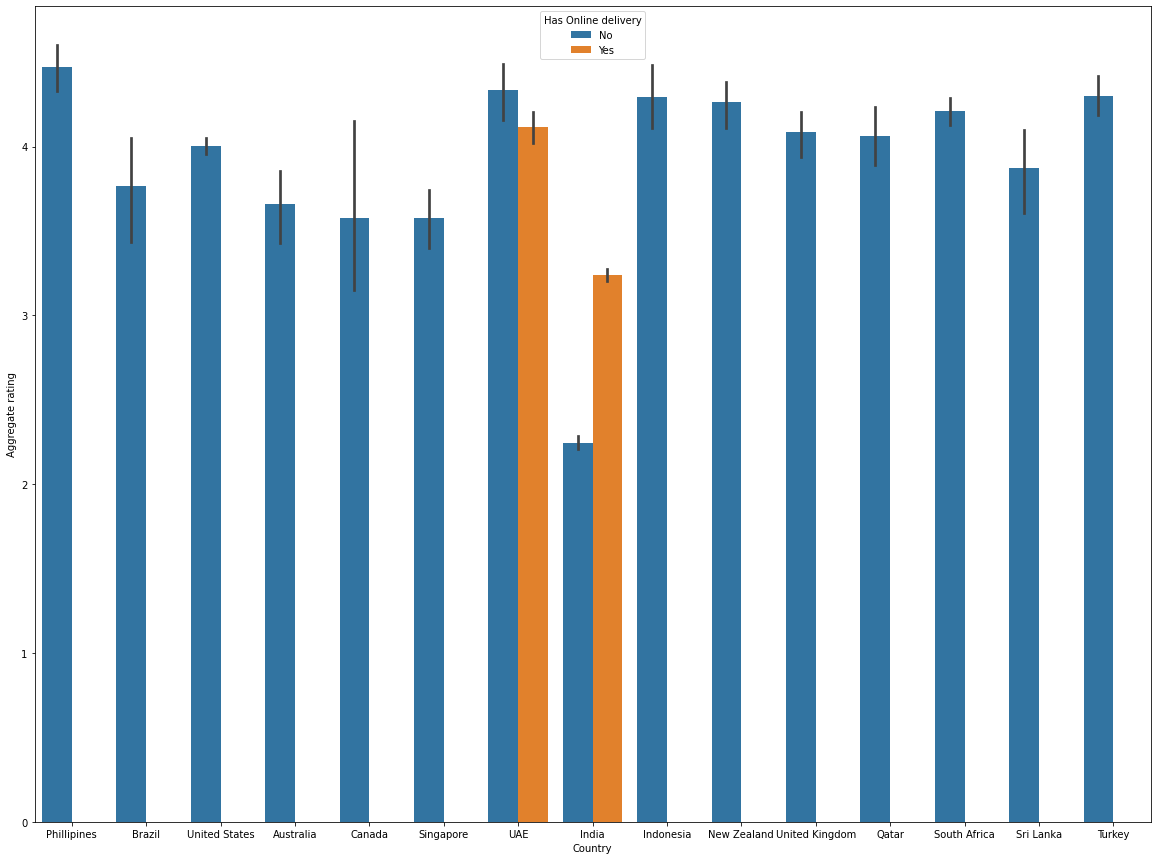

In [121]:
 ##Country which has online delivery Available
plt.figure(figsize = (20,15))
sns.barplot(x = 'Country',y = 'Aggregate rating', data  = df2,hue = 'Has Online delivery')

In [150]:
df2[df2['Country']== 'India'].City.value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Guwahati          21
Amritsar          21
Ahmedabad         21
Bhubaneshwar      21
Lucknow           21
Nashik            20
Indore            20
Ludhiana          20
Allahabad         20
Nagpur            20
Coimbatore        20
Mangalore         20
Kochi             20
Puducherry        20
Kanpur            20
Kolkata           20
Aurangabad        20
Mysore            20
Bhopal            20
Surat             20
Patna             20
Vizag             20
Agra              20
Dehradun          20
Bangalore         20
Varanasi          20
Pune              20
Ranchi            20
Mumbai            20
Vadodara          20
Jaipur            20
Chennai           20
Goa               20
Hyderabad         18
Chandigarh        18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

In [152]:
f = df2[df2['Country']== 'India'].City.value_counts()

<AxesSubplot:>

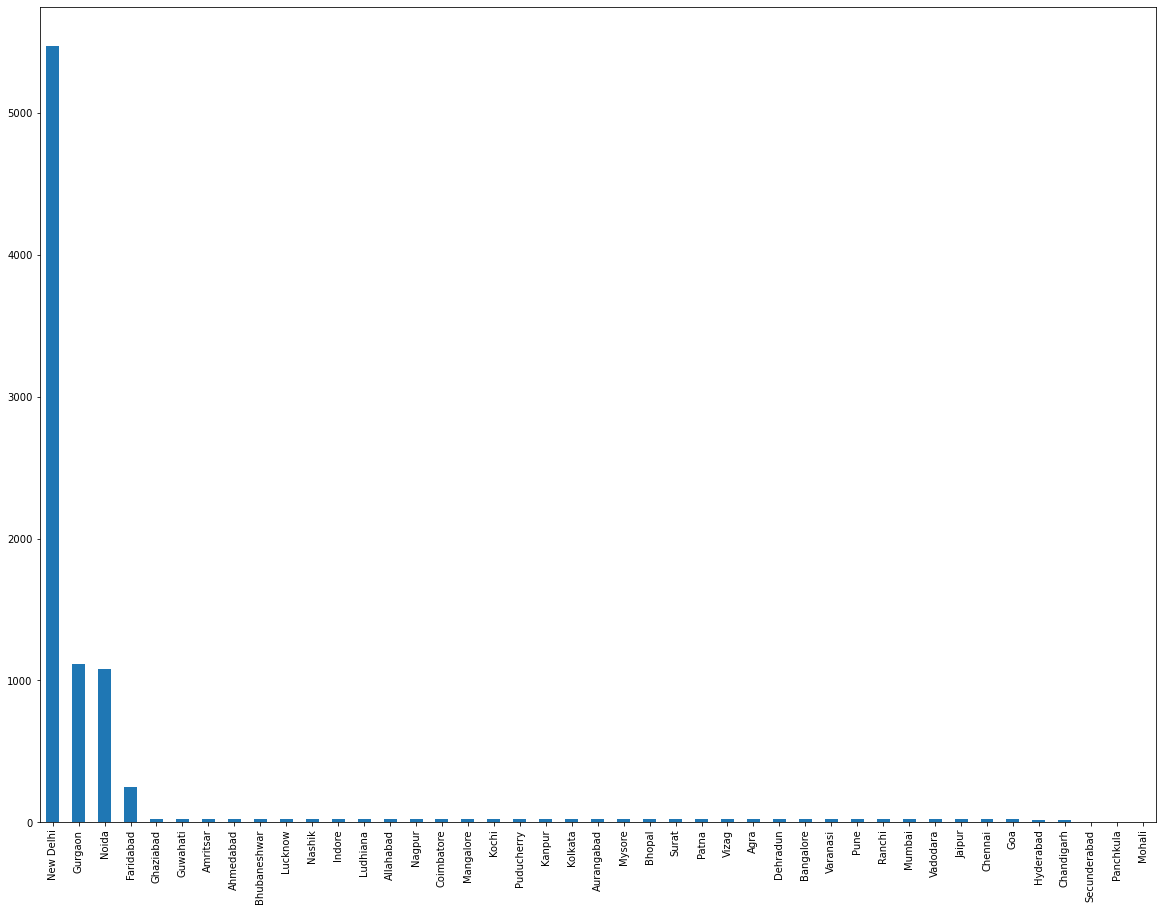

In [154]:
plt.figure(figsize = (20,15))
f.plot(kind = 'bar')

In [142]:
df2.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [159]:
df2[df2['Country']=='India'].Cuisines.value_counts()

North Indian                                              936
North Indian, Chinese                                     511
Fast Food                                                 348
Chinese                                                   340
North Indian, Mughlai                                     334
                                                         ... 
Desserts, Bakery, Pizza, Burger, Continental                1
Continental, Mexican, Italian                               1
Chinese, Japanese, Korean, Asian                            1
Healthy Food, Juices, Salad                                 1
Continental, Kashmiri, Italian, North Indian, Moroccan      1
Name: Cuisines, Length: 1392, dtype: int64

In [160]:
s=df2[df2['Country']=='India'].Cuisines.value_counts()[:20]

<AxesSubplot:>

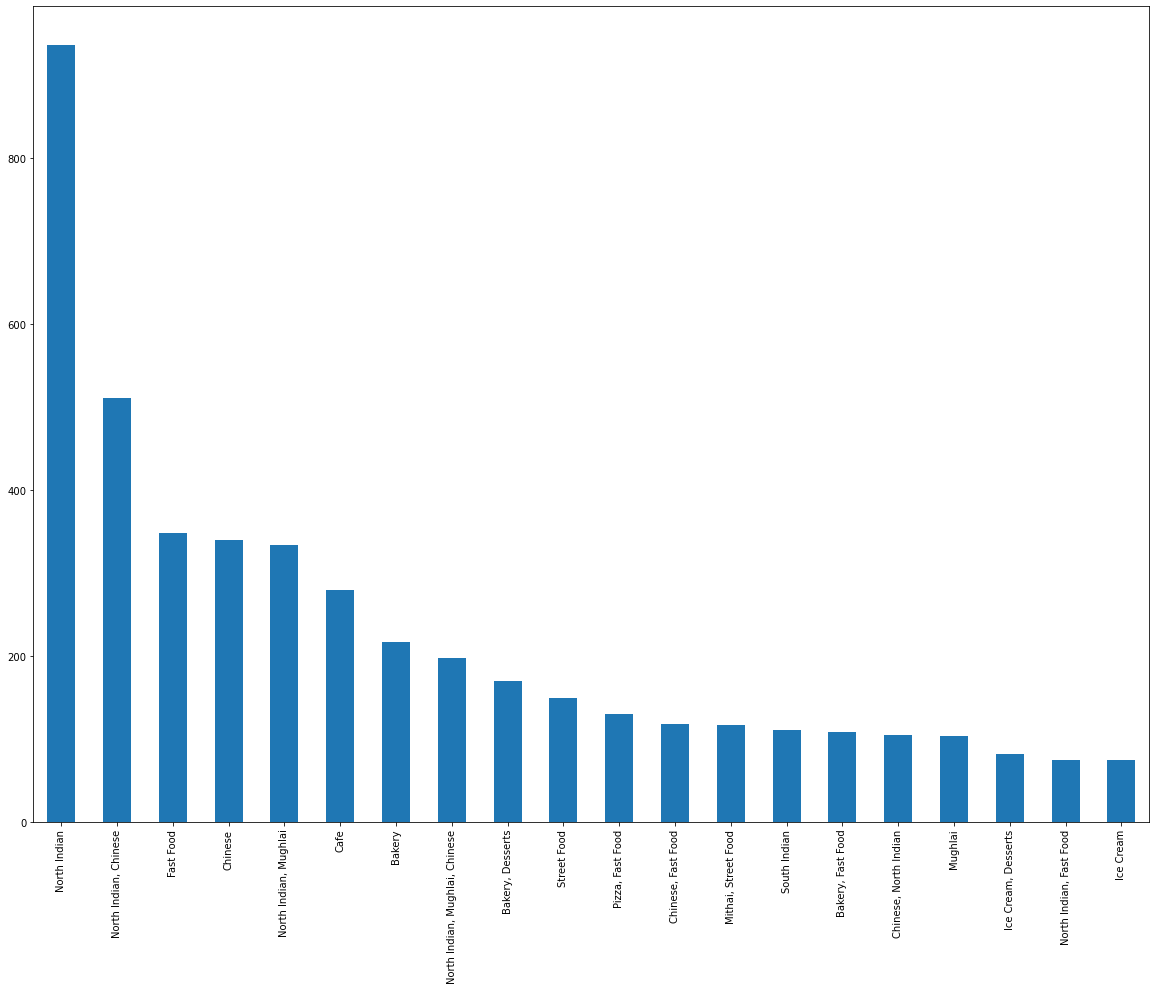

In [163]:
plt.figure(figsize = (20,15))
s.plot(kind = 'bar')

<AxesSubplot:xlabel='Country', ylabel='Aggregate rating'>

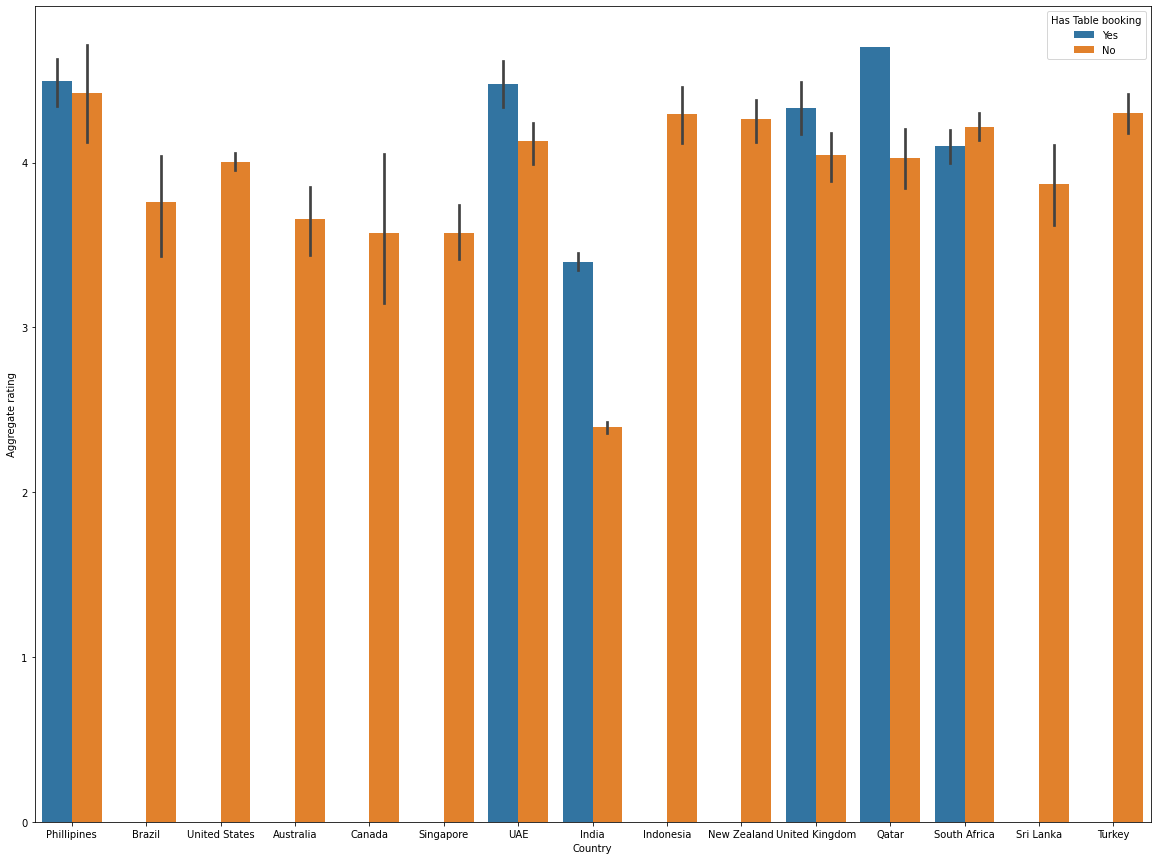

In [143]:
plt.figure(figsize = (20,15))
sns.barplot(x = 'Country',y = 'Aggregate rating', data  = df2,hue = 'Has Table booking')

<AxesSubplot:xlabel='Country', ylabel='Average Cost for two'>

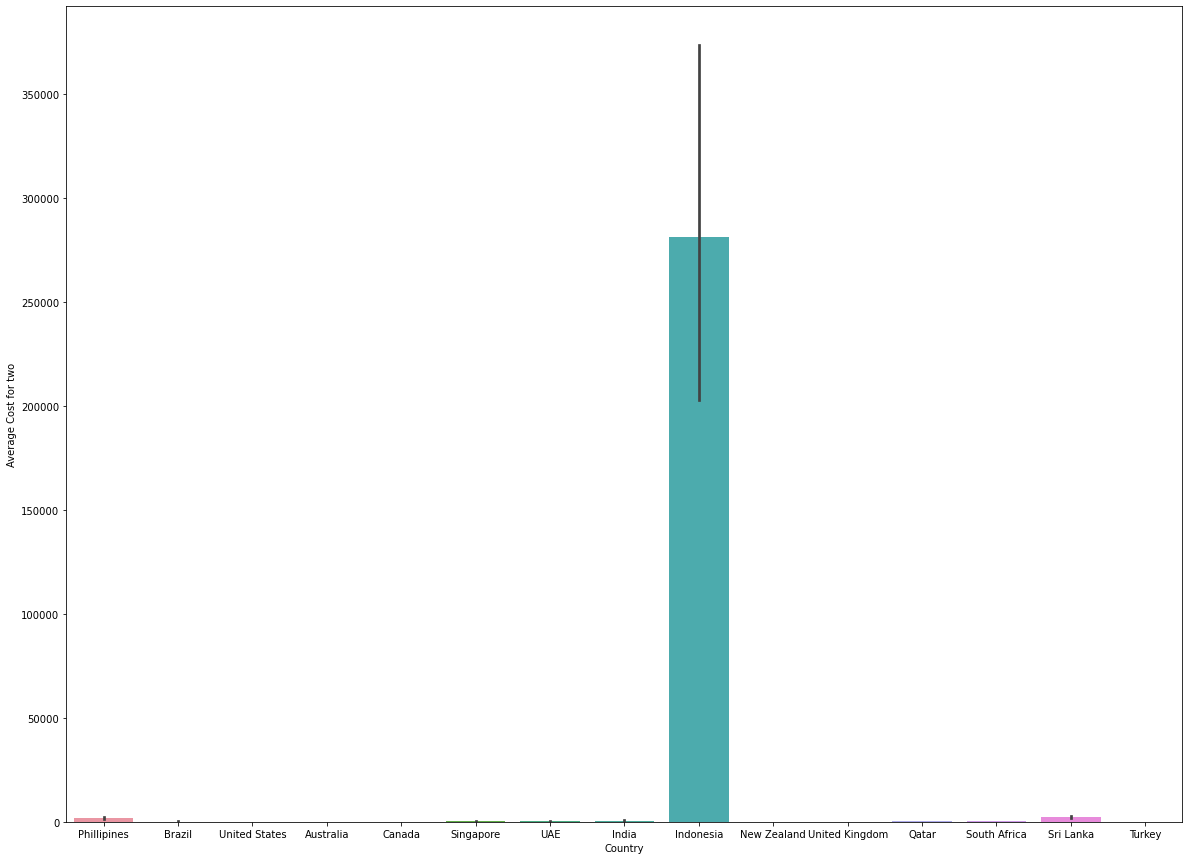

In [168]:
plt.figure(figsize = (20,15))
sns.barplot(x = 'Country',y = 'Average Cost for two', data  = df2)

<AxesSubplot:xlabel='Country', ylabel='Price range'>

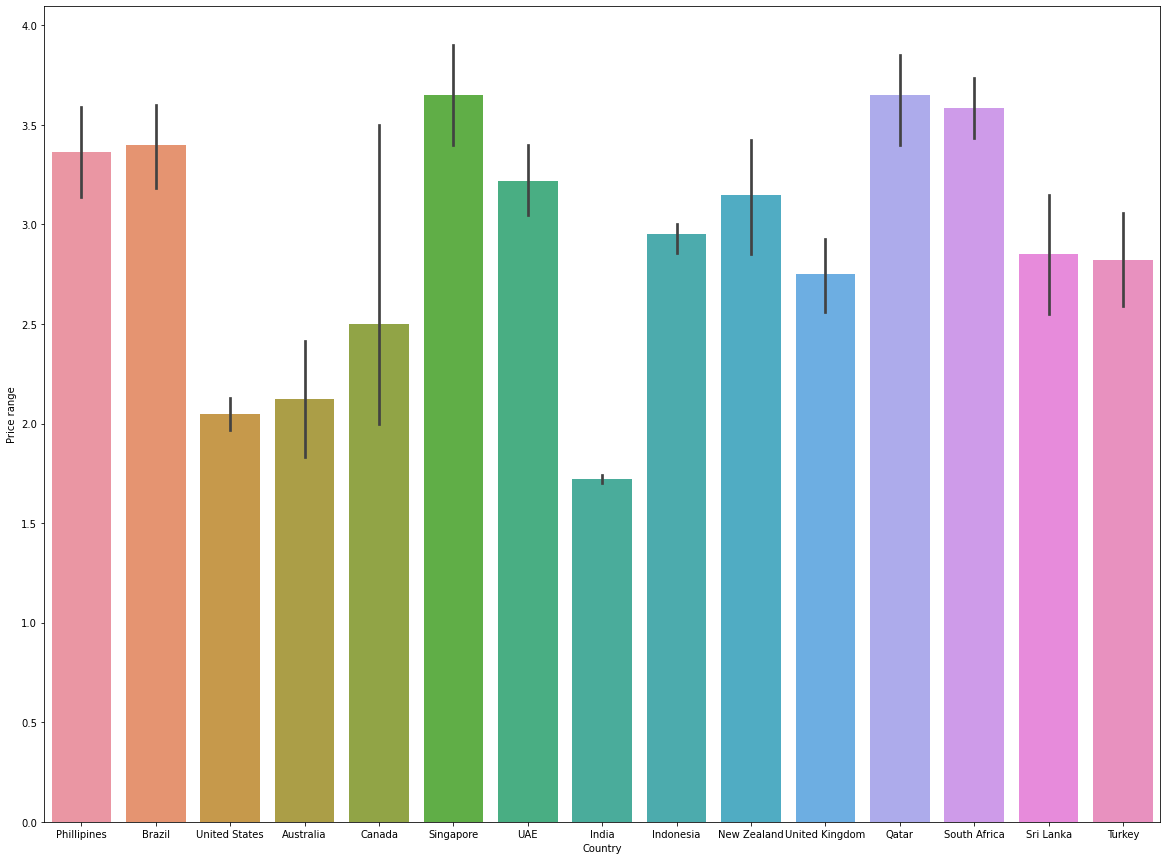

In [169]:
plt.figure(figsize = (20,15))
sns.barplot(x = 'Country',y = 'Price range', data  = df2,)

In [180]:
p = df2[df2['Country']== 'India'].City

<AxesSubplot:xlabel='City', ylabel='Average Cost for two'>

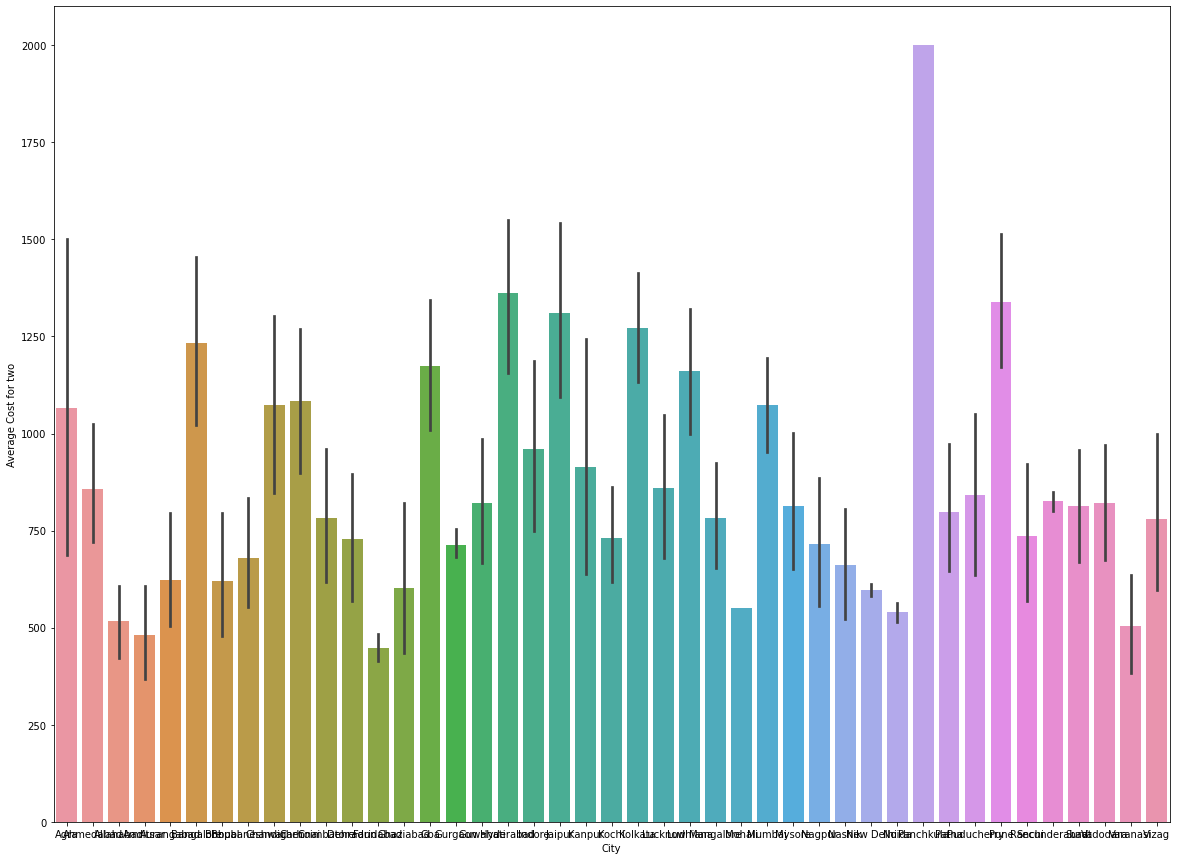

In [177]:
plt.figure(figsize = (20,15))
sns.barplot(x = p ,y = 'Average Cost for two', data  = df2)

# Observation

Number of transaction is mainly done by city 'New Delhi'.

Online Deliveries are available in India and UAE

Maximum Number of 0 Ratings are from Indian customers

Maximum Number of rating are between 2.5 to 3.4

When Rating is between 4.5 to 4.9 ---> Excellent

When Rating is between 4.0 to 4.4 ---> Very Good

When Rating is between 3.5 to 3.9 ---> Good

When Rating is between 3.0 to 3.4 ---> Average

When Rating is between 2.5 to 2.9 ---> Average

When Rating is between 2.0 to 2.4 ---> Poor

Table booking Option only done in Phillipince,UAE,UK,South africa

Average price range in india is very less and very high in singapore

Average cost of two in Indonesia is very high